# Heuristic Search 

In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from map_utils import *
from search import *

## 1. The Fully Observable Environment

In [4]:
# create the environment
env = gym.make("MiniHack-HideNSeek-Mapped-v0", observation_keys=["chars", "pixel", "colors"])
# reset it to initial state
state = env.reset()
# render the environment
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                  @.####.....                                   
                                  ...#.###.##                                   
                                  ...#.#.#..#                                   
                                  #..........                                   
                           

In [3]:
# create the custom environment
env = gym.make("MiniHack-Skill-Custom-v0", des_file="dat/fully_observable_c.des", observation_keys=["chars", "pixel", "colors"])
state = env.reset()
# render the environment
env.render()


Hello Agent, welcome to NetHack!  You are a neutral human Caveman.              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                  @.####.....                                   
                                  ...#.....##                                   
                                  ..#...#....                                   
                                  #.....#.#..                                   
                           

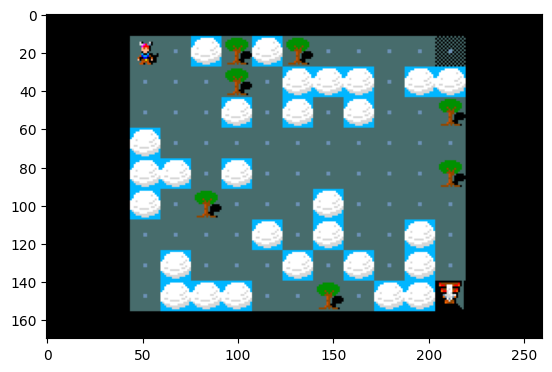

In [5]:
plt.imshow(state["pixel"][100:270, 500:760])

We'll start analysing a simple version of the problem, one that is fully observable and with a fixed monster (one that cannot hit range)

In [6]:
game_map = state["chars"]
color_map = state["colors"]
game = state["pixel"]

start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (7, 34)
Target position: (15, 44)


In [7]:
%%time
path = a_star(game_map, color_map, start, target, chebyshev_distance)

Target found!
CPU times: user 12.7 ms, sys: 1.78 ms, total: 14.5 ms
Wall time: 13.1 ms


In [8]:
actions = actions_from_path(start, path[1:])
print(actions)

[1, 1, 6, 1, 2, 1, 1, 6, 1, 1, 6, 1, 1, 6, 1, 1, 6, 1, 1, 6, 1, 1, 6, 1, 1]


RuntimeError: Called step on finished NetHack

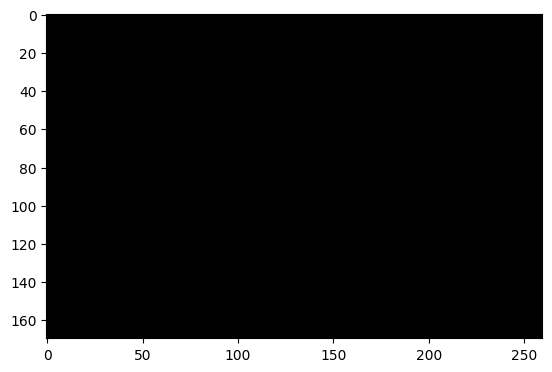

In [9]:
image = plt.imshow(game[100:270, 500:760])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][100:270, 500:760])